In [1]:
import pandas as pd

df = pd.read_csv('data/data_cleaned_twice.csv', index_col=0)
df = df.drop(columns=['student_id', 'name', 'is_female'])
df.head()

,class,gpa,is_greek,is_on_campus,distance_to_campus,is_sprinklered,claim_id,risk_tier,holdout,Business,Humanities,Other,Science,amount
3,3,1.203913,0,0,0.000000,1,0,2,0,0,1,0,0,0.0
7,3,0.609616,0,0,0.000000,1,0,2,0,0,0,0,1,0.0
11,3,3.073385,0,1,0.223942,0,0,2,0,1,0,0,0,0.0
15,4,3.224736,0,0,0.000000,0,0,3,0,1,0,0,0,0.0
19,2,2.687851,0,0,0.000000,0,0,1,0,1,0,0,0,0.0


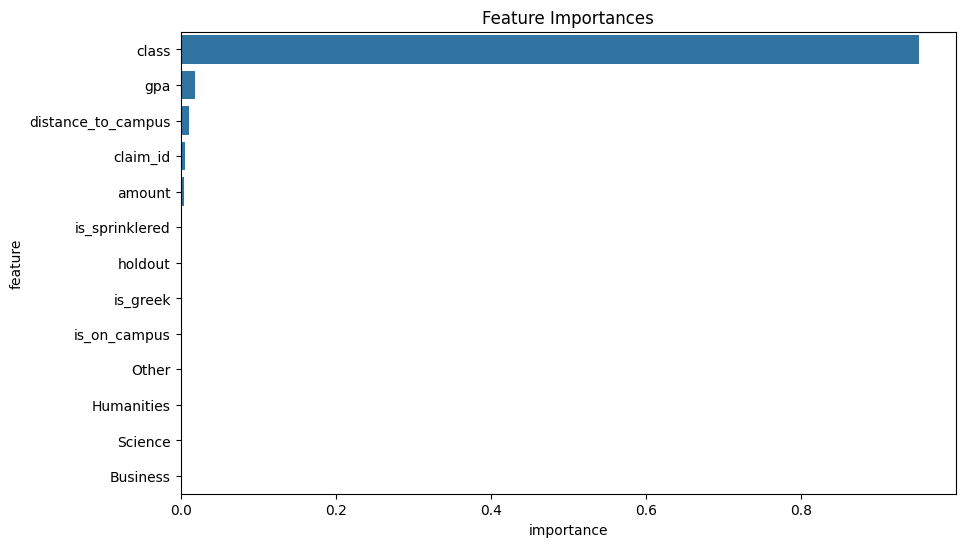

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1368
           2       1.00      1.00      1.00       657
           3       1.00      1.00      1.00       991

    accuracy                           1.00      3016
   macro avg       1.00      1.00      1.00      3016
weighted avg       1.00      1.00      1.00      3016



In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns

import matplotlib.pyplot as plt

# Define the features and target
X = df.drop(columns=['risk_tier'])
y = df['risk_tier']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

# Print classification report
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

In [3]:
feature_importances

,feature,importance
0,class,0.951357
1,gpa,0.018430
4,distance_to_campus,0.011111
6,claim_id,0.005346
12,amount,0.004911
5,is_sprinklered,0.001704
7,holdout,0.001467
2,is_greek,0.001453
3,is_on_campus,0.000926
10,Other,0.000874
